In [1]:
### Hi, this is a sentiment analysis of the Twitter activity for 5 News Media - BBC, CBS, CNN, Fox and New York times
### We are charting 2 plots - scatter using matplotlib and Bar graph using Seaborn libraries
###  Observation, 
### Ran the script 3 days consecutive just to collect samples and understand the variance in the sentiments of the 5 different media news
### 1. By looking at scatter plot (relation between tweets polarity and tweets time sorted, the tweet polarity is ranging from neutral (0) to -ve sentiments for most of the nytimes and foxnews. Only BBC,CBS and CNN were ranging between +ve and neutral
#### Continue #1-> conclusion, nytimes and Foxnews focus on somewhat -ve news.
####2. By looking at bar chart, CBS has overall highest positive tweets. 
### 3. Also plotted -ve average sentiments to check on which media is most overall sentiment -ve, mostly Fox and NY times were slightly have -ve sentiments comparitive to other 3 media sources

In [2]:
## Defining dependencies 
import json
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from datetime import datetime 
import numpy as np
## Using Vader Sentiment to analyse Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer= SentimentIntensityAnalyzer()

In [3]:
#seaborn settings
sns.set_palette("deep",desat=.6)
sns.set_context(rc={"figure:figsize":(8,4)})

In [7]:
## Twitter authentication details
consumer_key = "akczLSsb7D39rCQITi6HKKTbS"
consumer_secret = "ZzlplKxUh1agPMHRjouqC1E3T6gdssATmU2e1kiFupNodEwmrH"
access_token = "41056206-bpASiEYIYW7gti7fvZjm1ckaQfskqwMfUIDyfcGRQ"
access_token_secret = "AYjW9Maj2nOELJ7LLEj6YrfXmVqjYWN0lBpX4ariTXED2"
filename = 'apikey'
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            for row in f:
                consumer_key = row[0]
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

#api_key = get_file_contents(filename)
#print("Our API key is: %s" % (api_key))


In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
target_user = ("@BBC","@CBS","@CNN","@FoxNews","@nytimes")

In [10]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
tweet_times = []
tweet_count = []
tweet_text = []
tweet_compound_mean = []
tweet_negative_mean = []

In [11]:
## Function to capture compound mean that we can use in Seaborn plotting
def tweet_mean_call():
        tweet_compound_mean.append(np.mean(compound_list))
        tweet_positive_mean.append(np.mean(positive_list))
        tweet_negative_mean.append(np.mean(negative_list))

for user in target_user:
   
    counter=1
    
    for x in range(5):
        public_tweets = api.user_timeline(user,page=20)
        for tweet in public_tweets:
            #print("Tweet from %s #%s:%s" %(user,counter,tweet["text"]))
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_datetime = datetime.strptime(tweet["created_at"],"%a %b %d %H:%M:%S %z %Y")
            print("Tweet from %s #%s created on %s:%s" %(user,tweet_datetime,counter,tweet["text"]))
        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            tweet_times.append(tweet_datetime)
            tweet_count.append(counter)
            tweet_text.append(tweet["text"])
            counter = counter +1

    #print("Total number of tweets %s" %str(counter -1))
    print(" ---------------TWEET COMPLETED FOR %s-------------" %user)
    
    # Calculating 
    tweet_mean_call()
    
            

Tweet from @BBC #2017-12-29 13:41:30+00:00 created on 1:RT @BBCCiN: Best Day Ever? You weren't kidding!

Special thanks to @NiallOfficial​ for topping off a wonderful day for some of the young ca…
Tweet from @BBC #2017-12-29 13:32:04+00:00 created on 2:Ever wondered what makes a wet dog smell? 🤔🐶 10 mysteries you’d like to get to the bottom of https://t.co/MthZREY7Ui https://t.co/o0LwuuXTlk
Tweet from @BBC #2017-12-29 13:00:06+00:00 created on 3:How do we control our body temperature? ❄️🌡

Dr Chris and Dr Xand investigate... https://t.co/kXW1DnCDax https://t.co/F1cyigzOfG
Tweet from @BBC #2017-12-29 12:32:03+00:00 created on 4:From Trump's presidency to the FIFA corruption scandal, The Simpsons has a habit of predicting the future. 

What p… https://t.co/VN0aP5WzSQ
Tweet from @BBC #2017-12-29 12:25:38+00:00 created on 5:RT @bbc5live: "One of the worst films I can remember seeing for many a year... I hope to never have to mention it or think about it ever ag…
Tweet from @BBC #2017-12-29

Tweet from @BBC #2017-12-29 13:41:30+00:00 created on 61:RT @BBCCiN: Best Day Ever? You weren't kidding!

Special thanks to @NiallOfficial​ for topping off a wonderful day for some of the young ca…
Tweet from @BBC #2017-12-29 13:32:04+00:00 created on 62:Ever wondered what makes a wet dog smell? 🤔🐶 10 mysteries you’d like to get to the bottom of https://t.co/MthZREY7Ui https://t.co/o0LwuuXTlk
Tweet from @BBC #2017-12-29 13:00:06+00:00 created on 63:How do we control our body temperature? ❄️🌡

Dr Chris and Dr Xand investigate... https://t.co/kXW1DnCDax https://t.co/F1cyigzOfG
Tweet from @BBC #2017-12-29 12:32:03+00:00 created on 64:From Trump's presidency to the FIFA corruption scandal, The Simpsons has a habit of predicting the future. 

What p… https://t.co/VN0aP5WzSQ
Tweet from @BBC #2017-12-29 12:25:38+00:00 created on 65:RT @bbc5live: "One of the worst films I can remember seeing for many a year... I hope to never have to mention it or think about it ever ag…
Tweet from @BBC #2017-

NameError: name 'tweet_positive_mean' is not defined

In [257]:
#print compound mean of sentiments for each media news
print(tweet_compound_mean)

[0.11086599999999999, 0.2134385, 0.16866233333333333, 0.13759725, 0.10342100000000001]


In [258]:
#print negative mean of sentiments for each media news
print(tweet_negative_mean)

[0.031979999999999995, 0.027539999999999995, 0.033116666666666662, 0.045269999999999991, 0.049906000000000006]


In [259]:
## Defining a dataframe
sentiment=pd.DataFrame({
            "User":user_list,
            "Tweet_count":tweet_count,
            "Tweet_date":tweet_times,
            "Tweet_text":tweet_text,
           "Compound":compound_list,
           "Positive":positive_list,
           "Neutral":neutral_list,
            "Negative":negative_list})
# Organize Dataframe
sentiment = sentiment[["User","Tweet_count","Tweet_date","Tweet_text","Compound","Positive","Neutral","Negative"]]

In [261]:
sentiment

,User,Tweet_count,Tweet_date,Tweet_text,Compound,Positive,Neutral,Negative
0,@BBC,1,2018-01-08 21:29:44+00:00,RT @bbc5live: Looking for some exercise and nu...,0.2960,0.095,0.905,0.000
1,@BBC,2,2018-01-08 21:29:01+00:00,RT @bbcasiannetwork: 📡 The Asian Network Futur...,0.0000,0.000,1.000,0.000
2,@BBC,3,2018-01-08 21:28:07+00:00,RT @bbcthesocial: Jordan thought nobody would ...,-0.1655,0.069,0.831,0.099
3,@BBC,4,2018-01-08 21:27:12+00:00,"RT @bbcworldservice: ""Our job as journalists i...",0.3182,0.095,0.905,0.000
4,@BBC,5,2018-01-08 21:23:06+00:00,RT @BBCiPlayer: 🎁 #HardSun is the new #boxset ...,-0.2500,0.000,0.882,0.118
5,@BBC,6,2018-01-08 21:22:32+00:00,RT @BBCWthrWatchers: Some cracking sunsets 🌇 i...,0.0772,0.061,0.939,0.000
6,@BBC,7,2018-01-08 20:30:06+00:00,The #SilentWitness team are back. \n\n9pm | @B...,0.0000,0.000,1.000,0.000
7,@BBC,8,2018-01-08 20:04:03+00:00,Recy Taylor: who was the woman Oprah mentioned...,0.0000,0.000,1.000,0.000
8,@BBC,9,2018-01-08 19:37:04+00:00,"Tonight, go beyond the theatre doors and disco...",0.0000,0.000,1.000,0.000
9,@BBC,10,2018-01-08 19:02:01+00:00,"🦌❄ The moment a moose, which got stuck up to i...",0.1779,0.119,0.793,0.088


In [262]:
sentiment['User'].unique()

array(['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes'], dtype=object)

In [154]:
# Push the sentiment DataFrame to a new CSV file
sentiment.to_csv("sentiment.csv", encoding="utf-8", index=False, header=True)

In [155]:
### Sorting by time of tweets and assigning to each dataframe
BBC_df=sentiment[sentiment['User']=="@BBC"]
BBC_df=BBC_df.sort_values(by='Tweet_date', ascending = False)
CBS_df=sentiment[sentiment['User']=="@CBS"]
CBS_df=CBS_df.sort_values(by='Tweet_date', ascending = False)
CNN_df=sentiment[sentiment['User']=="@CNN"]
CNN_df=BBC_df.sort_values(by='Tweet_date', ascending = False)
FoxNews_df=sentiment[sentiment['User']=="@FoxNews"]
FoxNews_df=FoxNews_df.sort_values(by='Tweet_date', ascending = False)
nytimes_df=sentiment[sentiment['User']=="@nytimes"]
nytimes_df=nytimes_df.sort_values(by='Tweet_date', ascending = False)

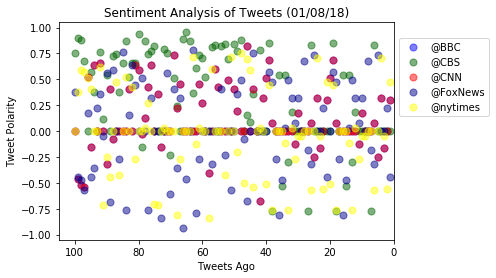

In [205]:
## Incorporate the scatter plot
ax1=BBC_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="blue",s=50, alpha=0.5, label='@BBC')
ax2=CBS_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="darkgreen", s=50, alpha=0.5, label='@CBS',ax=ax1)
ax3=CNN_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="red", s=50, alpha=0.5, label='@CNN',ax=ax2)
ax4=FoxNews_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="darkblue", s=50, alpha=0.5, label='@FoxNews',ax=ax3)
ax5=nytimes_df.plot(kind='scatter',x = "Tweet_count", y = "Compound",c="yellow",s=50, alpha=0.5, label='@nytimes',ax=ax4)

plt.title("Sentiment Analysis of Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim([-1.05,1.05])
plt.xlim([105,0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.75))
plt.show()

In [157]:
public_tweets = api.home_timeline()

# Loop through all tweets
for tweet in public_tweets:
    # Utilize JSON dumps to generate a pretty-printed json
    print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
    #print(tweet['counter'])

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Mon Jan 08 21:56:42 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/R5OnxW2thW",
                "expanded_url": "https://twitter.com/SrBachchan/status/950486447097724928/photo/1",
                "id": 950486353879289856,
                "id_str": "950486353879289856",
                "indices": [
                    37,
                    60
                ],
                "media_url": "http://pbs.twimg.com/media/DTDOTY7U0AAq27B.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DTDOTY7U0AAq27B.jpg",
                "sizes": {
                    "large": {
                        "h": 2048,
                        "resize": "fit",
                        "w": 1502
                    },
                    "medium": {
                        "h": 1200,
                        "resize": "fit",
          

In [158]:
#### Seaborn

In [187]:
## Defining overall Sentiment dataframe
overall_sentiment = pd.DataFrame ({"User":target_user,
                                "tweet_compound_mean":tweet_compound_mean,
                                  "tweet_negative_mean":tweet_negative_mean})
overall_sentiment

,User,tweet_compound_mean,tweet_negative_mean
0,@BBC,0.110866,0.031980
1,@CBS,0.213439,0.027540
2,@CNN,0.171734,0.029537
3,@FoxNews,0.128808,0.046867
4,@nytimes,0.098242,0.051730


In [188]:
#colors={"@BBC":'lightblue',"@CBS":'green',"@CNN":'red',"@Fox":'blue',"@nytimes":'yellow'}
colors=["lightblue", "green", "red", "blue", "yellow"]

In [189]:
sns.barplot(x='User',y='tweet_compound_mean',data=overall_sentiment,palette=colors)
# Sets the y limits of Sentiments
plt.ylim(-0.8,0.8)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment(compound data) based on Twitter (%s)" % time.strftime("%x"),loc = "center")

Text(0.5,1,'Overall Media Sentiment(compound data) based on Twitter (01/08/18)')

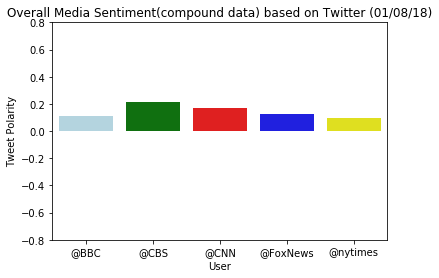

In [190]:
plt.show()

In [185]:
sns.barplot(x='User',y='tweet_negative_mean',data=overall_sentiment,palette=colors)
# Sets the y limits of Sentiments
plt.ylim(-0.8,0.8)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media negative Sentiment based on Twitter (%s)" % time.strftime("%x"),loc = "center")

Text(0.5,1,'Overall Media negative Sentiment based on Twitter (01/08/18)')

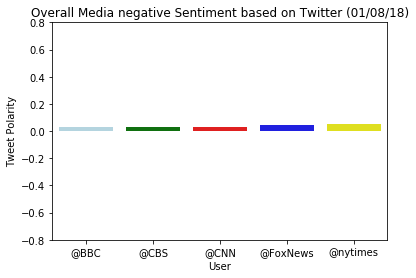

In [186]:
plt.show()